# Style Transfer 

I just realize that tensorflow can be used to beautify images. The concept is blending two pictures into one. The first picture will be used as the original picture (base) and the second is used as theme image (blending). This source actually from IDCamp 2021 and Dicoding 

## Import Modules

In [6]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import PIL.Image
import functools
import time

## Style Builder

In [7]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [8]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resizeing the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

## Upload Picture

In [32]:
original = image_to_tensor('assassin.jpg')
style = image_to_tensor('desain.jpg')

## Color Blending

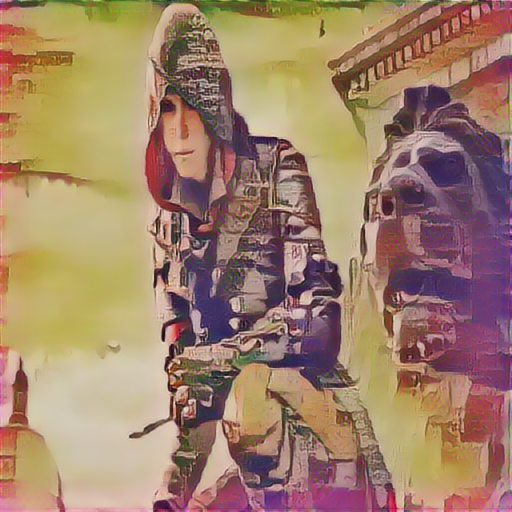

In [33]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized = hub_module(tf.constant(original), tf.constant(style))[0]
tensor_to_image(stylized)